### Import libraries and create data frame

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler


# Prepare Data

In [92]:
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
'''
# Standardize Data Formats
# Convert categorical columns to 'category' type
stroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')
stroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')
stroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')
stroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')
stroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')
'''

"\n# Standardize Data Formats\n# Convert categorical columns to 'category' type\nstroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')\nstroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')\nstroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')\nstroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')\nstroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')\n"

In [94]:
# Ensure Consistency
# Convert 'id' to string 
stroke_df['id'] = stroke_df['id'].astype(str)

In [95]:
# Display the cleaned DataFrame and its data types
display(stroke_df.head())
print(stroke_df.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                    object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [96]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [97]:
stroke_df = stroke_df.dropna()

### Split into X and y

In [98]:
X = stroke_df.drop(columns=['id', 'stroke'])
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [99]:
y = stroke_df['stroke']

### Train test split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [101]:
X_train.isna().sum()/len(stroke_df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [102]:
(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.2271338358117743

In [103]:
X_train.isna().sum()/len(stroke_df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [104]:
X_train.loc[X_train['smoking_status'] == 'Unknown'].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,29.848395,0.029596,0.024215,98.309076,25.632646
std,24.731807,0.169547,0.153786,35.465744,7.911487
min,0.080000,0.000000,0.000000,55.230000,10.300000
25%,8.000000,0.000000,0.000000,76.445000,19.500000
50%,23.000000,0.000000,0.000000,89.320000,24.500000
75%,50.000000,0.000000,0.000000,108.955000,29.900000
max,82.000000,1.000000,1.000000,254.600000,61.200000


In [105]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000
mean,42.945928,0.093181,0.049443,105.665270,28.931839
std,22.430785,0.290726,0.216821,44.940296,7.737312
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,76.880000,23.700000
50%,45.000000,0.000000,0.000000,91.820000,28.100000
75%,60.000000,0.000000,0.000000,113.640000,33.100000
max,82.000000,1.000000,1.000000,271.740000,78.000000


<Axes: ylabel='Frequency'>

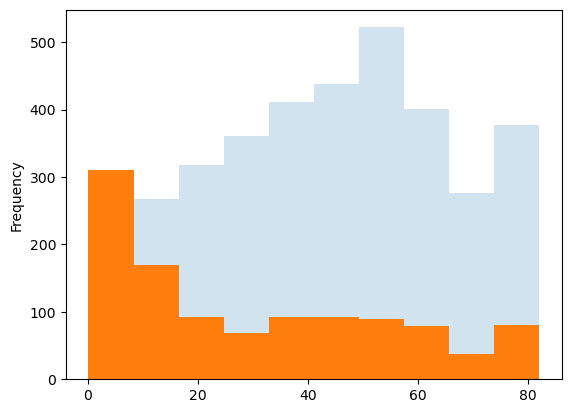

In [106]:
X_train['age'].plot(kind='hist',alpha=0.2)
X_train.loc[stroke_df['smoking_status'] == 'Unknown', 'age'].plot(kind='hist')

In [107]:
# We will assume most of the unknown values below the legal smoking age fall into the never smoked category
for index, row in X_train.iterrows():
    if row['age'] <= 18:
        X_train.at[index, 'smoking_status'] = 'never smoked'

(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.12202077816255856

In [108]:
'''
for x in stroke_df:
    display(stroke_df[x].value_counts())
'''

'\nfor x in stroke_df:\n    display(stroke_df[x].value_counts())\n'

### Scale The Data

In [109]:
scaler = StandardScaler()
col_scale = ['age', 'bmi', 'avg_glucose_level']
#Fit the scaler to the columnsint he training set
X_train[col_scale]=scaler.fit_transform(X_train[col_scale])
#Transform
X_test[col_scale]=scaler.fit_transform(X_test[col_scale])


In [110]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
271,Female,0.269937,0,0,Yes,Private,Rural,-1.011374,0.331964,smokes
2605,Male,-1.468981,0,0,No,children,Urban,-0.639719,-1.697440,never smoked
2863,Female,0.671226,0,0,Yes,Govt_job,Rural,-0.718946,0.991197,formerly smoked
2278,Male,-0.042177,0,0,Yes,Private,Rural,0.886513,0.370743,formerly smoked
2664,Male,0.180762,0,0,Yes,Self-employed,Urban,-0.236463,-0.029968,never smoked


## Encode the dataset

In [111]:
#encode# List 
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type']

#One-Hot Encoding with pd.get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

#Check the data
X_train_encoded.head()
#X_train_encoded.isna().sum()/len(stroke_df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
271,0.269937,0,0,-1.011374,0.331964,smokes,False,False,True,False,True,False,False,False
2605,-1.468981,0,0,-0.639719,-1.697440,never smoked,True,False,False,False,False,False,True,True
2863,0.671226,0,0,-0.718946,0.991197,formerly smoked,False,False,True,False,False,False,False,False
2278,-0.042177,0,0,0.886513,0.370743,formerly smoked,True,False,True,False,True,False,False,False
2664,0.180762,0,0,-0.236463,-0.029968,never smoked,True,False,True,False,False,True,False,True


In [112]:
# Create an encoder for the backpack_color column
smoke_ord_enc = OrdinalEncoder(categories = [['smokes','formerly smoked','never smoked']],encoded_missing_value = -1,
                               handle_unknown = 'use_encoded_value', unknown_value = -1) 
#PUT CATEGORIES IN ORDER LOWEST TO HIGHEST ORDER

# Train the encoder
smoke_ord_enc.fit(X_train['smoking_status'].values.reshape(-1,1))

OrdinalEncoder(categories=[['smokes', 'formerly smoked', 'never smoked']],
               encoded_missing_value=-1, handle_unknown='use_encoded_value',
               unknown_value=-1)

In [113]:
X_train_encoded['smoking_status_ordinal'] = smoke_ord_enc.fit_transform(X_train_encoded['smoking_status'].values.reshape(-1,1))
X_test_encoded['smoking_status_ordinal'] = smoke_ord_enc.fit_transform(X_test_encoded['smoking_status'].values.reshape(-1,1))

In [114]:
X_test_encoded.tail(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
1491,1.107064,1,0,-0.206097,-0.155931,never smoked,True,True,False,True,False,False,False,2.0
4320,0.060034,1,0,-0.481885,-0.570924,never smoked,True,True,False,False,True,False,False,2.0
1645,-0.768866,0,0,-0.598645,1.028021,never smoked,False,False,False,True,False,False,True,2.0
509,-0.158098,0,0,-0.453862,0.844935,never smoked,False,True,False,True,False,False,False,2.0
2374,0.670802,0,0,1.557682,0.234651,Unknown,True,False,False,False,True,False,False,-1.0
3707,0.539923,0,0,-0.642780,1.333163,formerly smoked,False,True,False,True,False,False,False,1.0
2069,1.019812,0,0,2.284397,0.356708,smokes,False,True,False,True,False,False,True,0.0
2229,0.496297,1,0,0.004538,1.076843,smokes,True,True,False,False,True,False,False,0.0
998,-0.594360,0,0,-0.713537,-0.949300,Unknown,False,False,False,True,False,False,True,-1.0
1935,0.409044,0,0,-0.161261,-0.851654,smokes,False,True,False,True,False,False,True,0.0


In [115]:
X_train_encoded = X_train_encoded.drop(['smoking_status'], axis=1)
X_test_encoded = X_test_encoded.drop(['smoking_status'], axis=1)

In [121]:
X_test_encoded.tail(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
1491,1.107064,1,0,-0.206097,-0.155931,True,True,False,True,False,False,False,2.0
4320,0.060034,1,0,-0.481885,-0.570924,True,True,False,False,True,False,False,2.0
1645,-0.768866,0,0,-0.598645,1.028021,False,False,False,True,False,False,True,2.0
509,-0.158098,0,0,-0.453862,0.844935,False,True,False,True,False,False,False,2.0
2374,0.670802,0,0,1.557682,0.234651,True,False,False,False,True,False,False,-1.0
3707,0.539923,0,0,-0.642780,1.333163,False,True,False,True,False,False,False,1.0
2069,1.019812,0,0,2.284397,0.356708,False,True,False,True,False,False,True,0.0
2229,0.496297,1,0,0.004538,1.076843,True,True,False,False,True,False,False,0.0
998,-0.594360,0,0,-0.713537,-0.949300,False,False,False,True,False,False,True,-1.0
1935,0.409044,0,0,-0.161261,-0.851654,False,True,False,True,False,False,True,0.0


## Random Oversampling

In [116]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_encoded, y_train)


In [117]:
# Count distinct resampled values
y_resampled.value_counts()

stroke
0    3530
1    3530
Name: count, dtype: int64

In [118]:
# 
X_train_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
271,0.269937,0,0,-1.011374,0.331964,False,False,True,False,True,False,False,False,0.0
2605,-1.468981,0,0,-0.639719,-1.697440,True,False,False,False,False,False,True,True,2.0
2863,0.671226,0,0,-0.718946,0.991197,False,False,True,False,False,False,False,False,1.0
2278,-0.042177,0,0,0.886513,0.370743,True,False,True,False,True,False,False,False,1.0
2664,0.180762,0,0,-0.236463,-0.029968,True,False,True,False,False,True,False,True,2.0


In [119]:
# Instantiate an initial RamdonForestClassifier instance
model = RandomForestClassifier(random_state = 42)

# Fit the initial model based the training data
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [120]:
# Make predictions for testing features
y_pred = model.predict(X_test_encoded)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- gender_Other


In [ ]:
# Print the classification reports for the two models
print(classification_report(y_test, y_pred))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred),3)}")

# SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


In [ ]:
y_train_resampled.value_counts()

### Random Forest

In [ ]:
# Instantiate an initial RamdonForestClassifier instance
rfc_model = RandomForestClassifier(random_state = 42)

# Fit the initial model based the training data
rfc_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_rfc = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred_rfc))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_rfc),3)}")

### Decision Tree

In [ ]:
# Instantiate an initial decision tree instance
dt_model = DecisionTreeClassifier(random_state = 42)

# Fit the initial model based the training data
dt_model.fit(X_train_resampled, y_train_resampled)

# Predict y data
y_pred_dt = dt_model.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred_dt))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_dt),3)}")

### Logistic Regression

In [ ]:
# Instantiate an initial logistic regression instance
lr_model = LogisticRegression(random_state = 42)

# Fit the initial model based the training data
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict y data
y_pred_lr = lr_model.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred_lr))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_lr),3)}")

### SVC

In [ ]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_resampled, y_train_resampled)
y_pred_svc = svc_model.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred_svc))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_svc),3)}")

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train_resampled, y_train_resampled)
y_pred_ada = ada_model.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred_ada))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_ada),3)}")

## Voting Classifier

In [ ]:
voting_clf = VotingClassifier(estimators=[('rfc', rfc_model), ('dt', dt_model), ('lr', lr_model), ('ada',ada_model)], voting='soft')

In [ ]:
voting_clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_voting = voting_clf.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred_voting))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_voting),3)}")

In [ ]:
# Import libraries and create data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC  # Importing Support Vector Classifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")

# Data Cleaning and Preprocessing
# Standardizing Data Formats
stroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')
stroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')
stroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')
stroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')
stroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')
stroke_df['id'] = stroke_df['id'].astype(str)

# Split the dataset into features (X) and target (y)
X = stroke_df.drop(columns=['id', 'stroke'])
y = stroke_df['stroke']

# Handle missing values (fill bmi column)
X['bmi'] = X['bmi'].fillna(stroke_df['bmi'].mean())

# Replace 'Unknown' values in smoking_status based on age
for index, row in X.iterrows():
    if row['smoking_status'] == 'Unknown' and row['age'] <= 18:
        X.at[index, 'smoking_status'] = 'never smoked'

# One-Hot Encoding of categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1)

# Random Oversampling to handle class imbalance
random_oversampler = RandomOverSampler(random_state=1)
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

# Alternatively, you could use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the SVC model
svc_model = SVC(random_state=42)

# Fit the model using the resampled data (SMOTE or RandomOversampler)
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svc))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_svc), 3)}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the SVC model (make sure you use a linear kernel)
svc_model_linear = SVC(kernel='linear', random_state=42)
svc_model_linear.fit(X_train_resampled, y_train_resampled)

# Extract the coefficients (feature importance)
coefficients = svc_model_linear.coef_.flatten()

# Create a DataFrame with feature names and their corresponding importance
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': np.abs(coefficients)  # Using absolute value of coefficients
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Linear SVC')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Fit the SVC model (non-linear)
svc_model_non_linear = SVC(kernel='rbf', random_state=42)
svc_model_non_linear.fit(X_train_resampled, y_train_resampled)

# Compute permutation importance
result = permutation_importance(svc_model_non_linear, X_test, y_test, n_repeats=10, random_state=42)

# Get importance scores
importance_scores = result.importances_mean

# Create a DataFrame for the importance
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance_scores
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance from Non-linear SVC (Permutation Importance)')
plt.gca().invert_yaxis()  # Invert y-axis for descending order of importance
plt.show()

In [ ]:
# Assuming that we have trained the SVC model with the following line:
svc_model_linear = SVC(kernel='linear', random_state=42)
svc_model_linear.fit(X_train_resampled, y_train_resampled)

# Get the feature importance (coefficients)
coefficients = svc_model_linear.coef_.flatten()

# Create a DataFrame with feature names and importance
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': np.abs(coefficients)  # Absolute value of coefficients for importance
})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Check if "age" is the most important feature
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Linear SVC')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [ ]:
# Assuming that we have trained the SVC model with the following line:
svc_model_linear = SVC(kernel='linear', random_state=42)
svc_model_linear.fit(X_train_resampled, y_train_resampled)

# Get the feature importance (coefficients)
coefficients = svc_model_linear.coef_.flatten()

# Create a DataFrame with feature names and importance
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': np.abs(coefficients)  # Absolute value of coefficients for importance
})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))

# Horizontal bar plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightblue')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Importance')
plt.title('Feature Importance from Linear SVC')

# Optionally, add annotations for clarity (show importance scores on bars)
for index, value in enumerate(feature_importance['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left', fontsize=10)

# Remove unnecessary ticks and grids
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot showing 'age' vs. 'avg_glucose_level' colored by 'stroke'
plt.figure(figsize=(10, 6))

sns.scatterplot(data=stroke_df, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7)

# Add labels and title
plt.title('Age vs Average Glucose Level with Stroke Outcome')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Align train and test sets to have the same columns
X_train_resampled, X_test_encoded = X_train_resampled.align(X_test_encoded, join='inner', axis=1)

# Ensure that columns in both sets are ordered the same way
X_train_resampled = X_train_resampled[X_test_encoded.columns]

# Check for NaN values
print(X_train_resampled.isna().sum())
print(X_test_encoded.isna().sum())

# Optionally fill NaN values (e.g., with mean, median, or mode)
X_train_resampled.fillna(X_train_resampled.mean(), inplace=True)
X_test_encoded.fillna(X_test_encoded.mean(), inplace=True)

In [ ]:
# Check the shape of target variables
print(y_train_resampled.shape)
print(y_test.shape)

# Check the first few values to ensure consistency
print(y_train_resampled.head())
print(y_test.head())

In [ ]:
# Make sure both the train and test datasets have the same column names
X_train_encoded.columns = X_train_encoded.columns.str.lower()
X_test_encoded.columns = X_test_encoded.columns.str.lower()

In [ ]:
# Check if all columns are numeric
print(X_train_resampled.dtypes)
print(X_test_encoded.dtypes)

In [ ]:
# Ensure the shape of the features is consistent
print(X_train_resampled.shape)
print(X_test_encoded.shape)

# Ensure the number of features matches between training and test set
assert X_train_resampled.shape[1] == X_test_encoded.shape[1], "Feature mismatch between train and test"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

# Ensure consistent column names between training and test data
X_train_resampled, X_test_encoded = X_train_resampled.align(X_test_encoded, join='inner', axis=1)
X_train_resampled = X_train_resampled[X_test_encoded.columns]  # Ensure same column order

# Ensure no NaN values
X_train_resampled.fillna(X_train_resampled.mean(), inplace=True)
X_test_encoded.fillna(X_test_encoded.mean(), inplace=True)

# Step 1: Instantiate KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the model with resampled data
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Make predictions using the test set
y_pred_knn = knn_model.predict(X_test_encoded)

# Step 4: Evaluate the KNN model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Balanced accuracy score
print(f"KNN Balanced Accuracy Score: {round(balanced_accuracy_score(y_test, y_pred_knn), 3)}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming X_test_encoded contains the test features
# Step 1: Reduce dimensionality using PCA (or t-SNE)
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test_encoded)

# Alternatively, you can use t-SNE for non-linear dimensionality reduction
# tsne = TSNE(n_components=2)
# X_test_2d = tsne.fit_transform(X_test_encoded)

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))

# Plotting the true labels in one color
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='coolwarm', label='True Labels', alpha=0.5)

# Plotting the predicted labels in another color
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_knn, marker='x', cmap='coolwarm', label='Predictions', alpha=0.5)

# Adding titles and labels
plt.title("Scatterplot of True vs Predicted Labels (KNN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")
plt.legend()

# Show the plot
plt.show()